<a href="https://colab.research.google.com/github/hawk-in-cloud/AI_LearningNotebook/blob/main/TargetSegmentation/TargetF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# 1. 安装依赖库（在Colab中运行需要加!）
!pip install torch torchvision opencv-python-headless matplotlib
!pip install git+https://github.com/facebookresearch/segment-anything.git

# 2. 下载预训练模型（以vit_b为例）
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth

   ━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━ 151.7/363.4 MB 38.5 MB/s eta 0:00:06ERROR: Operation cancelled by user
   ━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━ 151.7/363.4 MB 38.5 MB/s eta 0:00:06
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-6_bcbya5
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-6_bcbya5
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=899f6b31694f21c98c4666c1f237148f734d1a1e49ebd1c0531c00888d150d95
  Stored in directory: /tmp/pip-ephem-wheel-cache-7lphr542/wheels/15/d7/bd/05f5f23b7dcbe70cbc6783b06f12143b0cf1a5da5c7b52dcc5
Successfully built segment_anything
--2025-04-08 09:52:20--  https://dl.fbaipublicfiles.com/segment_anything/sam

In [8]:
# 3. 导入库
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import SamPredictor, sam_model_registry


In [9]:
# 4. 加载模型
sam = sam_model_registry["vit_b"](checkpoint="sam_vit_b_01ec64.pth")
predictor = SamPredictor(sam)


In [10]:
# 5. 上传测试图像到Colab（运行后点击上传按钮）

from google.colab import files
uploaded = files.upload()
image_path = next(iter(uploaded))  # 获取上传文件名

# 下载示例图像（小狗）
# !wget https://github.com/ADlead/Dogs-Cats/blob/master/data/test1/10030.jpg
# image_path = "10030.jpg"

Saving dog1.jpg to dog1.jpg


In [11]:
# 6. 读取并预处理图像
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # 转换为RGB格式
predictor.set_image(image)  # SAM需要先编码图像

In [12]:
# 7. 定义交互点（示例坐标，需要根据你的图像调整）
# 点击图片查看坐标，例如：小狗的鼻子位置可能是 (500, 300)
input_point = np.array([[350, 113]])  # 格式为[[x,y]]
input_label = np.array([1])  # 1=前景，0=背景

In [34]:
from PIL import Image
import os

def save_mask_as_png(mask, filename, output_dir="masks"):
    """
    将二值掩码保存为PNG文件
    :param mask: 二维numpy数组 (True/False)
    :param filename: 保存文件名（无需后缀）
    :param output_dir: 输出目录
    """
    # 创建输出目录
    os.makedirs(output_dir, exist_ok=True)

    # 转换掩码为0-255图像
    mask_image = (mask * 255).astype(np.uint8)

    # 保存为PNG
    full_path = os.path.join(output_dir, f"{filename}.png")
    Image.fromarray(mask_image).save(full_path)
    print(f"Saved mask to: {full_path}")

Saved mask to: masks/Person1_mask.png.png


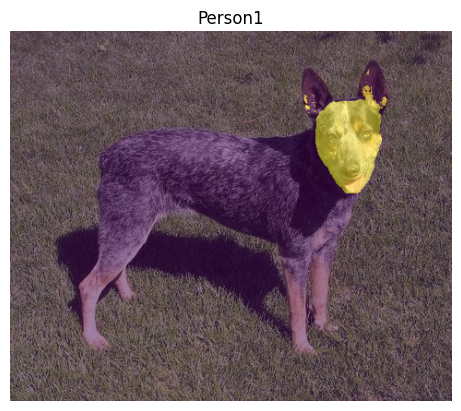

Saved mask to: masks/Person2_mask.png.png


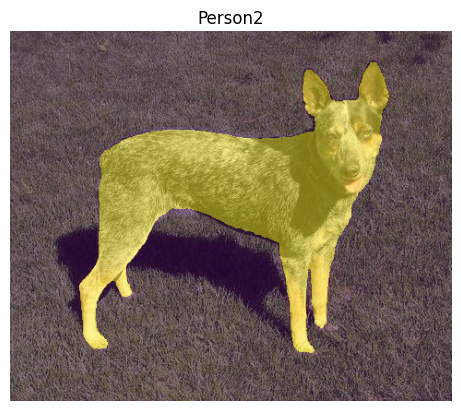

Saved mask to: masks/Person3_mask.png.png


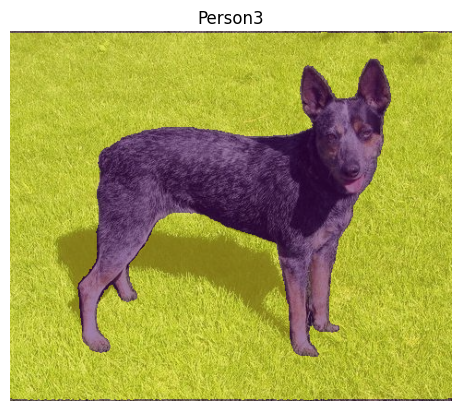

In [39]:
# 定义多个角色的坐标（根据实际图像调整）

people_points = [
    [[360, 120], "Person1"],  # 第一个人的坐标和标签
    [[145, 154], "Person2"],  # 第二个人的坐标
    [[204, 325], "Person3"]   # 第三个人的坐标
]

for point, label in people_points:
    masks, scores, _ = predictor.predict(
        point_coords=np.array([point]),
        point_labels=np.array([1]),
        multimask_output=True
    )
    best_mask = masks[np.argmax(scores)]
    # 保存或显示每个分割结果
    save_mask_as_png(best_mask, f"{label}_mask.png")

    # 可视化（可选）
    plt.figure()
    plt.imshow(image)
    plt.imshow(best_mask, alpha=0.5)
    plt.title(label)
    plt.axis('off')
    plt.show()

In [31]:
# 8. 生成分割掩码
masks, scores, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True  # 输出3个候选掩码
)

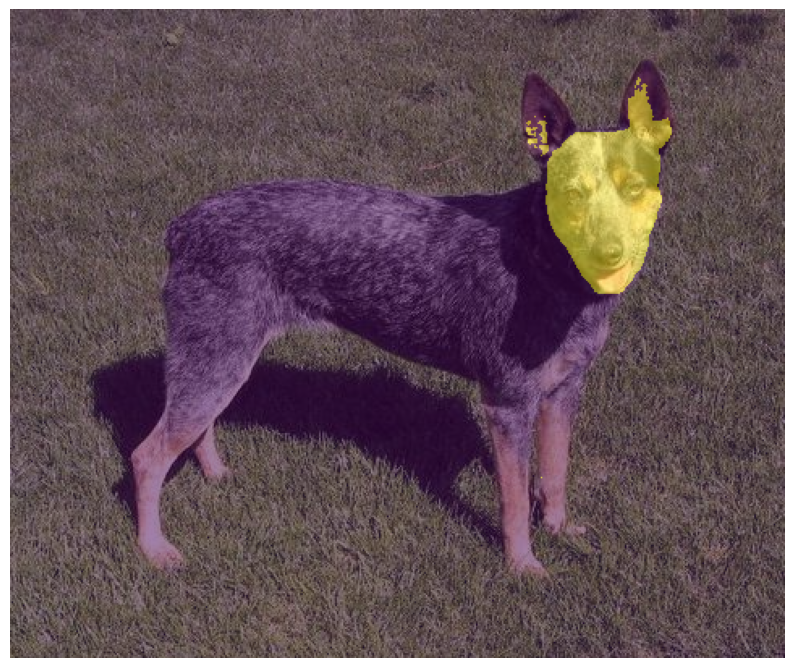

In [33]:
# 9. 可视化最佳结果
best_mask = masks[scores.argmax()]

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.scatter(input_point[:,0], input_point[:,1], color='red', marker='*', s=200, edgecolor='white')  # 显示点击位置
plt.imshow(best_mask, alpha=0.5)  # 半透明叠加掩码
plt.axis('off')
plt.show()